In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

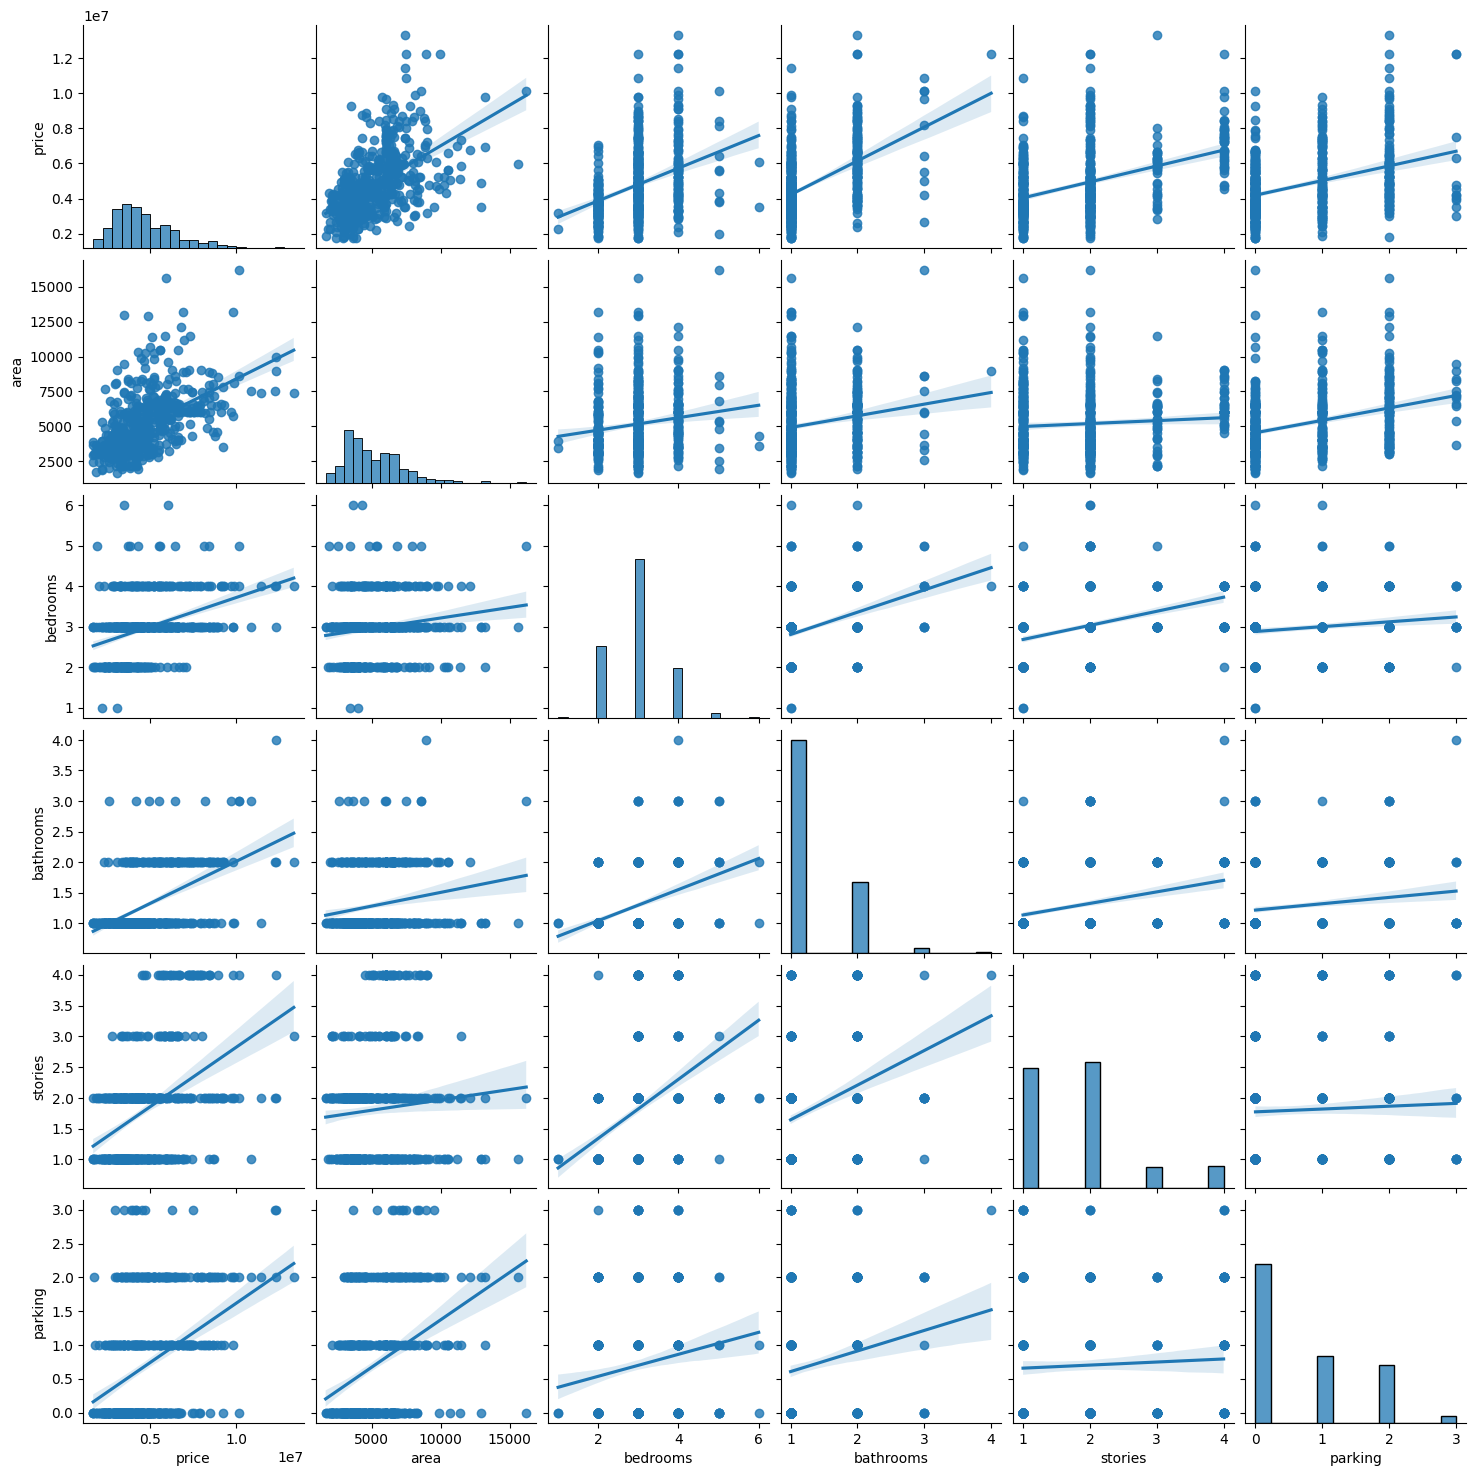

In [4]:
sns.pairplot(df, kind='reg')

In [5]:
X=df.drop(columns=['price'])
y=df['price']

In [6]:
print(X)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [7]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [8]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=12)

In [9]:
cat_cols= X.select_dtypes(include=['object']).columns
nums_cols=X.select_dtypes(include=['number']).columns

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [11]:
cat_pipe=Pipeline(
    steps=[
        ('encoder',OneHotEncoder(drop='first'))
    ]
)

In [12]:
num_pipe=Pipeline(
    steps=[
        ('scaler',StandardScaler())
    ]
)

In [13]:
preprocessor= ColumnTransformer(transformers=[
    ('cat',cat_pipe,cat_cols),
    ('num',num_pipe,nums_cols)
])

In [14]:
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lr',LinearRegression())
])

In [15]:
model.fit(Xtrain,ytrain)

,steps,"[('preprocessor', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [16]:
from joblib import dump, load
with open('models/house_pred.pkl','wb') as f:
    dump(model, f)
    print("model dumped successfully")

model dumped successfully
